In [245]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cbbDF = pd.read_csv('/Users/winstonvu/Downloads/cbb (1).csv')
# Remove years not needed (2013-2015)
cbbDF = cbbDF[cbbDF.YEAR !=2013]
cbbDF = cbbDF[cbbDF.YEAR !=2014]
cbbDF = cbbDF[cbbDF.YEAR !=2015]
print(cbbDF.shape)
# Dropping columns not needed
cbbDF = cbbDF.drop(columns=['BARTHAG','WAB','SEED'])
# Rename columns
cbbDF = cbbDF.rename(columns={'TEAM':'Team', 'CONF':'Conf', 'G':'Games_Played', 'W':'Games_Won', 'ADJOE':'Adj_Off_Eff',
                             'ADJDE':'Adj_Def_Eff', 'EFG_O':'Eff_FG%_Off', 'EFG_D':'Eff_FG%_Def','TOR':'Turnover_Rate', 
                              'TORD':'Steal Rate', 'ORB':'Off_Reb_Rate', 'DRB':'Def_Reb_Rate', 'FTR':'FT_Rate_Off', 'FTRD':'FT_Rate_Def',
                             '2P_O':'2_Point%_Off', '2P_D':'2_Point%_Allowed', '3P_O':'3_Point%_Off', '3P_D':'3_Point%_Allowed',
                             'ADJ_T':'Adj_Tempo', 'YEAR':'Year'})
# Sorting by year
cbbDF = cbbDF.sort_values(by = ['Year'], ascending = False)
# Switch NAs to 0
cbbDF = cbbDF.fillna(0)
# Add win% column
cbbDF['Win%'] = (cbbDF['Games_Won']/cbbDF['Games_Played'])*100
#cbbDF = cbbDF.sort_values(by = ['Win%'], ascending = False)
print(cbbDF)
print('Post preparation shape:\n {}'.format(cbbDF.shape))

(1406, 24)
                     Team  Conf  Games_Played  Games_Won  Adj_Off_Eff  \
636             Milwaukee  Horz            30          9         98.6   
839    South Carolina St.  MEAC            32          8         97.3   
1208                  VMI    SC            29         11        101.2   
1207       UNC Greensboro    SC            34         29        104.4   
1206          The Citadel    SC            27         12        106.0   
...                   ...   ...           ...        ...          ...   
1363        Grambling St.  SWAC            28          4         85.9   
1362  Arkansas Pine Bluff  SWAC            33          8         87.8   
1361           Alcorn St.  SWAC            28         13         96.8   
1360          Alabama St.  SWAC            29         12         98.0   
0          North Carolina   ACC            40         33        123.3   

      Adj_Def_Eff  Eff_FG%_Off  Eff_FG%_Def  Turnover_Rate  Steal Rate  ...  \
636         107.4         48.1   

In [197]:
# 1) Which team had the highest win percentage within the 4 years
# Find the row with the highest win percentage
maxWin = cbbDF.loc[cbbDF['Win%'].idxmax()]
print('The team with the highest win percentage was {} at {:.2f}% in the year {}.'.format(maxWin['Team'], maxWin['Win%'], maxWin['Year']))
#The lowest?
# Finding row with lowest win percentage
minWin = cbbDF.loc[cbbDF['Win%'].idxmin()]
print('The team with the lowest win percentage was {} at {:.2f}% in the year {}.'.format(minWin['Team'], minWin['Win%'], minWin['Year']))

The team with the highest win percentage was Gonzaga at 94.87% in the year 2017.
The team with the lowest win percentage was Chicago St. at 3.45% in the year 2016.


In [198]:
# 2) Which teams had the highest 3-point percentage?
# Created different table with team and 3-point percentage offense
cbb3Off = cbbDF[['Team', '3_Point%_Off']]
max3Off = cbb3Off.nlargest(5, '3_Point%_Off') # delegated to finding top 5 teams
print('Highest 3 point percentage teams: \n {}'.format(max3Off))
print('\n')
# Worst at defending the 3?
# Created different table with team and 3-point percentage defense
cbb3Def = cbbDF[['Team', '3_Point%_Allowed']]
worst3Def = cbb3Def.nlargest(5, '3_Point%_Allowed') # 5 worse 3 point defending teams, meaning values should be high
print('The worst 3 point defending teams: \n {}'.format(worst3Def))

Highest 3 point percentage teams: 
                 Team  3_Point%_Off
2181    Michigan St.          43.4
2205       Marquette          42.9
1109          Lehigh          42.4
521   William & Mary          42.2
45          Oklahoma          42.2


The worst 3 point defending teams: 
                Team  3_Point%_Allowed
258     USC Upstate              43.1
364   Southern Utah              42.2
1451     Pepperdine              42.0
1343         Denver              41.8
551            Rice              41.8


In [199]:
# 3) Average win percent for Texas?
# Locate row for Texas
cbbTexas = cbbDF.loc[cbbDF['Team']=='Texas']
# Find mean of win %
avgWinTexas = cbbTexas['Win%'].mean()
print('The average win percentage for Texas is {:.2f}% from the year 2016 to 2019.\n'.format(avgWinTexas))

# Average win percent for Syracuse
# Locate row for Syracuse
cbbSyr = cbbDF.loc[cbbDF['Team']=='Syracuse']
# Find mean win %
avgWinSyr = cbbSyr['Win%'].mean()
print('The average win percentage for Syracuse is {:.2f}% from the year 2016 to 2019.\n'.format(avgWinSyr))

# Avg win percent for past champions (North Carolina, Villanova, Virginia)
# Note: Villanova won March Maddness in 2016 and 2018
# UNC avg win percent
cbbUNC = cbbDF.loc[cbbDF['Team']=='North Carolina']
avgWinUNC = cbbUNC['Win%'].mean()
print('The average win percentage for UNC is {:.2f}% from the year 2016 to 2019. \n'.format(avgWinUNC))

#Villanova win percentage
cbbVil = cbbDF.loc[cbbDF['Team']=='Villanova']
avgWinVil = cbbVil['Win%'].mean()
print('The average win percentage for Villanova is {:.2f}% from the year 2016 to 2019. \n'.format(avgWinVil))

#Virginia win percentage
cbbUVA = cbbDF.loc[cbbDF['Team']=='Virginia']
avgWinUVA = cbbUVA['Win%'].mean()
print('The average win percentage for Virginia is {:.2f}% from the year 2016 to 2019.'.format(avgWinUVA))

The average win percentage for Texas is 51.64% from the year 2016 to 2019.

The average win percentage for Syracuse is 59.76% from the year 2016 to 2019.

The average win percentage for UNC is 79.49% from the year 2016 to 2019. 

The average win percentage for Villanova is 84.65% from the year 2016 to 2019. 

The average win percentage for Virginia is 82.33% from the year 2016 to 2019.


Win Percentage Correlation:
 Win%                1.000000
Adj_Off_Eff         0.695083
Eff_FG%_Off         0.634095
2_Point%_Off        0.593644
3_Point%_Off        0.442494
Off_Reb_Rate        0.291860
Steal Rate          0.175753
FT_Rate_Off         0.129505
Adj_Tempo          -0.045864
FT_Rate_Def        -0.285449
Def_Reb_Rate       -0.382775
Turnover_Rate      -0.420977
3_Point%_Allowed   -0.492452
2_Point%_Allowed   -0.511597
Eff_FG%_Def        -0.602441
Adj_Def_Eff        -0.651037
Name: Win%, dtype: float64


<AxesSubplot:>

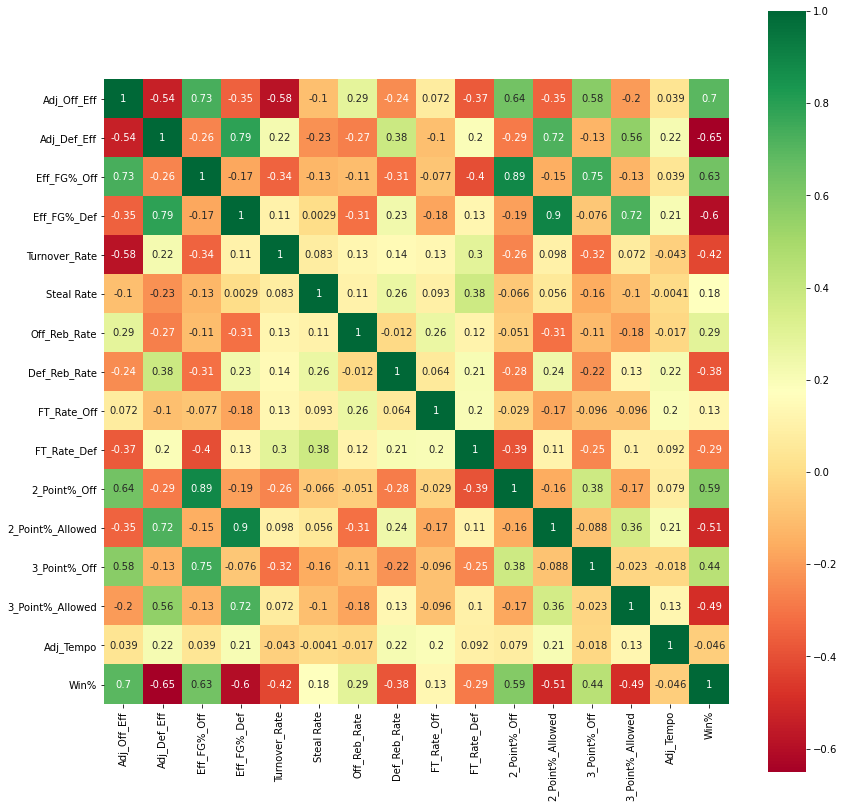

In [247]:
import seaborn as sns
# 4) What stats are highly correlated to win percentage?
# Stats we want to uncover are offensive and defensive efficeincy, power rating, FG% Off and Def, TO rate, Steal rate, offensive and defensive rebounds, FTs, 2 and 3 point shot, and adjusted tempo
cbbDF2 = cbbDF.drop(columns = ['Team', 'Conf', 'Games_Played','Games_Won','POSTSEASON','Year'])
cbbCor = cbbDF2.corr()
# Set win percentage from highest to lowest according to win %
winCor = cbbCor['Win%'].sort_values(ascending = False)
print('Win Percentage Correlation:\n', winCor)

# Creating a heatmap for correlation matrix
plt.figure(figsize = (14,14))
sns.heatmap(cbbCor, cmap = 'RdYlGn', square = True, annot = True)

In [248]:
# 5) Perform multiple linear regression analysis on stats to win percentage.
from sklearn import linear_model
import statsmodels.api as sm
# Setting independent and dependent variables
# Set x for 3-pointer variables and y as win%
x = cbbDF2[['3_Point%_Allowed', '3_Point%_Off']]
y = cbbDF2['Win%']

# Create regression model
cbbReg = linear_model.LinearRegression()
model = cbbReg.fit(x,y)

# Adding constant to avoid covariance (issue that occurred when constant was not added)
x = sm.add_constant(x)

# Create OLS results to see results like r-squared and p-value
valmod = sm.OLS(cbbDF2['Win%'], x).fit()
print(valmod.summary())
print('Intercept:', model.intercept_)
print('Cofficients:', model.coef_)
print('R2 value:', valmod.rsquared)
print('F-stat:', valmod.fvalue)
print('F-stat p-value:', valmod.f_pvalue)
print('p-value:\n', valmod.pvalues)

                            OLS Regression Results                            
Dep. Variable:                   Win%   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     526.0
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          3.40e-171
Time:                        10:53:51   Log-Likelihood:                -5644.4
No. Observations:                1406   AIC:                         1.129e+04
Df Residuals:                    1403   BIC:                         1.131e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               80.6017      7.171  

In [212]:
# Multicollinearity check 
# Need VIF package
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Set as dataframe
vif = pd.DataFrame()
# Set feature name
vif['Feature'] = x.columns
# Find VIF results for columns (in this case 3-point stats)
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif)

            Feature         VIF
0             const  401.528824
1  3_Point%_Allowed    1.000528
2      3_Point%_Off    1.000528


Text(0.5, 1.0, '3-Point Offense with Linear Fit')

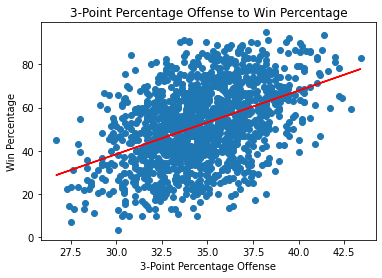

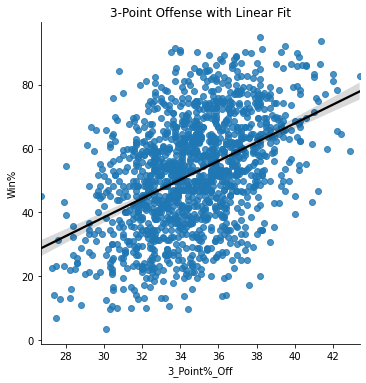

In [244]:
# Plot for 3-point percentage with linear line
x = cbbDF['3_Point%_Off']
y = cbbDF['Win%']
plt.scatter(x,y)
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x+b, color='red')
plt.title('3-Point Percentage Offense to Win Percentage')
plt.xlabel('3-Point Percentage Offense')
plt.ylabel('Win Percentage')
# Plot for 3-point percentage with linear fit
sns.lmplot(x='3_Point%_Off', y='Win%', data = cbbDF, line_kws ={'color':'black'})
plt.title('3-Point Offense with Linear Fit')

Text(0.5, 1.0, '3-Point Defense with Linear Fit')

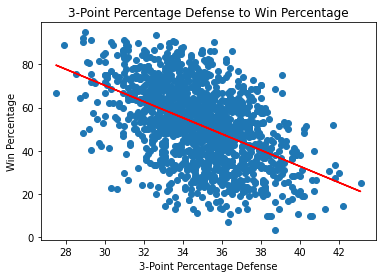

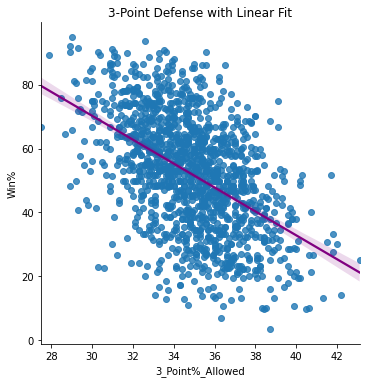

In [243]:
# Plot for 3-point defense and win percentage with linear line
x = cbbDF['3_Point%_Allowed']
y = cbbDF['Win%']
plt.scatter(x,y2)
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x+b, color='red')
plt.title('3-Point Percentage Defense to Win Percentage')
plt.xlabel('3-Point Percentage Defense')
plt.ylabel('Win Percentage')
#Plot with linear line
sns.lmplot(x='3_Point%_Allowed', y='Win%', data = cbbDF, line_kws ={'color':'purple'})
plt.title('3-Point Defense with Linear Fit')

Text(0, 0.5, 'Win Percentage')

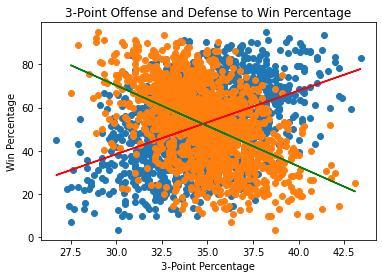

In [252]:
x = cbbDF['3_Point%_Off']
x2 = cbbDF['3_Point%_Allowed']
y = cbbDF['Win%']
plt.scatter(x,y)
plt.scatter(x2,y)
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x+b, color='red')
m, b = np.polyfit(x2,y,1)
plt.plot(x2, m*x2+b, color='green')
plt.title('3-Point Offense and Defense to Win Percentage')
plt.xlabel('3-Point Percentage')
plt.ylabel('Win Percentage')
